In [1]:
import numpy as np
import pandas as pd

In [33]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
data.EstimatedSalary.value_counts()

72000     12
80000     11
79000     10
71000      9
75000      9
          ..
142000     1
100000     1
37000      1
114000     1
64000      1
Name: EstimatedSalary, Length: 117, dtype: int64

In [9]:
data= data.drop('User ID', axis= 1)

In [10]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
data.shape

(400, 4)

In [15]:
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])

In [17]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [43]:
data.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [20]:
data['Age'] = minmax_scale(data[['Age']])
data['EstimatedSalary'] = minmax_scale(data[['EstimatedSalary']])

In [21]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X.head() , Y.head()

(   Gender       Age  EstimatedSalary
 0       1  0.023810         0.029630
 1       1  0.404762         0.037037
 2       0  0.190476         0.207407
 3       0  0.214286         0.311111
 4       1  0.023810         0.451852, 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Purchased, dtype: int64)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

In [24]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
LR.predict(xtrain)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
score = accuracy_score(ytrain, LR.predict(xtrain))
score

0.8375

In [27]:
LR.predict(xtest)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [28]:
score = accuracy_score(ytest, LR.predict(xtest))
score

0.775

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
param_name = 'n_neighbors'
param_range = list(range(1, 20))
train_scores_knn, test_scores_knn = validation_curve(KNN, X, Y, param_name, param_range, cv = 10)

In [35]:
train_mean_scores_knn = np.mean(train_scores_knn, axis=1)
test_mean_scores_knn = np.mean(test_scores_knn, axis=1)

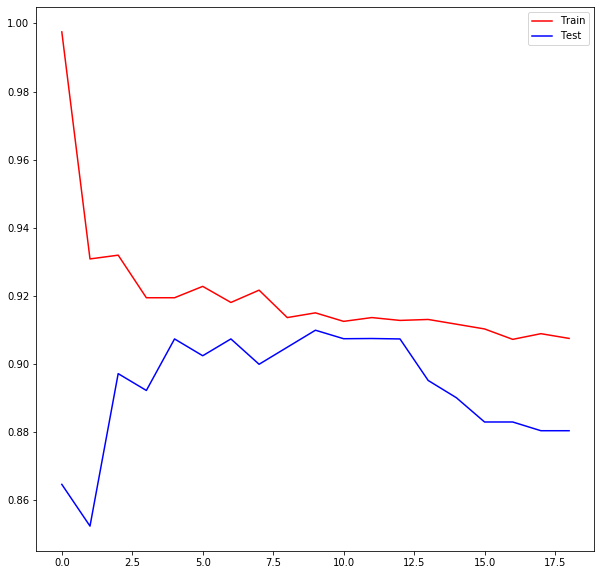

In [36]:
plt.figure(figsize=(10, 10))
plt.plot(train_mean_scores_knn, color = 'red')
plt.plot(test_mean_scores_knn, color = 'blue')
plt.legend(['Train', 'Test'])

In [38]:
LR = LogisticRegression()
param_name = 'random_state' 
param_range = [0]
train_scores_lr, test_scores_lr = validation_curve(LR, X, Y, param_name, param_range, cv = 10)

In [39]:
train_mean_scores_lr = np.mean(train_scores_lr, axis=1)
test_mean_scores_lr = np.mean(test_scores_lr, axis=1)

In [40]:
test_mean_scores_lr

array([0.82510475])